### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Nageswar/AIML/Labs/Residency4/vehicle.csv")

In [3]:
data= df.dropna(axis = 0, how ='any')
df.shape,data.shape

((846, 19), (813, 19))

In [4]:
#There are 33 records that doesn't have valid data

In [5]:
data.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [6]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

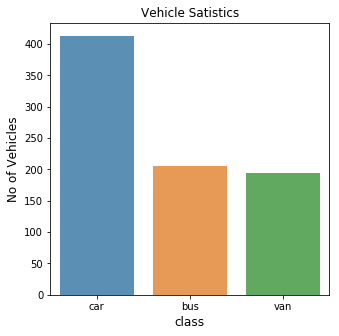

In [8]:
class_count  = data['class'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(class_count.index, class_count.values, alpha=0.8)
plt.title('Vehicle Satistics')
plt.ylabel('No of Vehicles', fontsize=12)
plt.xlabel('class', fontsize=12)
plt.show()

### Check for any missing values in the data 

In [9]:
data[:-1].isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [10]:
# There are no missing values.

### 3. Standardize the data 

In [11]:
X=data.drop("class",axis=1)
y=data["class"]

In [12]:
y.shape,X.shape

((813,), (813, 18))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [14]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
Z=linkage(X,'average')
c,coph_dists=cophenet(Z,pdist(X))
print(c)


0.7927518171715773


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [15]:
from sklearn.cluster import KMeans

In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [17]:
km=KMeans(n_clusters=2)
km.fit(X)
X["clusterLabels"]=km.predict(X)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,clusterLabels
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,0
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,0
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,0
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0


### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [18]:
distortion = []
distortion

[]

In [19]:
from scipy.spatial.distance import cdist
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortion.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [20]:
distortion

[2.966824380205441,
 2.6466801385956593,
 2.554982081211732,
 2.4359655883131848,
 2.3206791983230097,
 2.2509137273109574,
 2.174239450149885,
 2.1049498758194862,
 2.0392802048401615]

You can later use this array to plot the elbow plot

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [21]:
#Ideal no of clusters required are 4

### Find out the optimal value of K

Optimal value of K is 4

In [22]:
km=KMeans(n_clusters=4)
X=data.drop("class",axis=1)
km.fit(X)
X["clusterLabels"]=km.predict(X)
X.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,clusterLabels
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [23]:

km=KMeans(n_clusters=4)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
km.cluster_centers_

array([[8.92222222e+01, 4.27777778e+01, 7.58099415e+01, 1.58941520e+02,
        6.31228070e+01, 8.86842105e+00, 1.53707602e+02, 4.34766082e+01,
        1.93128655e+01, 1.43827485e+02, 1.76549708e+02, 3.51646199e+02,
        1.65590643e+02, 7.35964912e+01, 5.94736842e+00, 1.11228070e+01,
        1.88435673e+02, 1.94988304e+02, 1.75438596e-02],
       [1.04455056e+02, 5.34325843e+01, 1.02960674e+02, 2.01084270e+02,
        6.17752809e+01, 9.87640449e+00, 2.19337079e+02, 3.04382022e+01,
        2.45842697e+01, 1.67679775e+02, 2.31612360e+02, 7.13191011e+02,
        2.15483146e+02, 7.29494382e+01, 7.37078652e+00, 1.62359551e+01,
        1.87589888e+02, 1.96078652e+02, 1.00000000e+00],
       [8.78922156e+01, 3.83113772e+01, 6.39580838e+01, 1.33371257e+02,
        5.72395210e+01, 6.68862275e+00, 1.30413174e+02, 5.16407186e+01,
        1.77964072e+01, 1.33383234e+02, 1.51880240e+02, 2.52323353e+02,
        1.41101796e+02, 7.24610778e+01, 6.35928144e+00, 1.13473054e+01,
        1.88491018e+02

In [25]:
centroid=pd.DataFrame(km.cluster_centers_)
centroid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,89.222222,42.777778,75.809942,158.941520,63.122807,8.868421,153.707602,43.476608,19.312865,143.827485,176.549708,351.646199,165.590643,73.596491,5.947368,11.122807,188.435673,194.988304,0.017544
1,104.455056,53.432584,102.960674,201.084270,61.775281,9.876404,219.337079,30.438202,24.584270,167.679775,231.612360,713.191011,215.483146,72.949438,7.370787,16.235955,187.589888,196.078652,1.000000
2,87.892216,38.311377,63.958084,133.371257,57.239521,6.688623,130.413174,51.640719,17.796407,133.383234,151.880240,252.323353,141.101796,72.461078,6.359281,11.347305,188.491018,193.616766,1.988024
3,98.079365,46.714286,93.380952,198.833333,64.126984,8.595238,187.722222,35.023810,21.912698,150.198413,207.777778,532.190476,183.452381,68.293651,6.000000,13.698413,193.063492,200.047619,2.968254


### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [26]:
centroid.columns=colNames=X.columns
centroid

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,clusterLabels
0,89.222222,42.777778,75.809942,158.941520,63.122807,8.868421,153.707602,43.476608,19.312865,143.827485,176.549708,351.646199,165.590643,73.596491,5.947368,11.122807,188.435673,194.988304,0.017544
1,104.455056,53.432584,102.960674,201.084270,61.775281,9.876404,219.337079,30.438202,24.584270,167.679775,231.612360,713.191011,215.483146,72.949438,7.370787,16.235955,187.589888,196.078652,1.000000
2,87.892216,38.311377,63.958084,133.371257,57.239521,6.688623,130.413174,51.640719,17.796407,133.383234,151.880240,252.323353,141.101796,72.461078,6.359281,11.347305,188.491018,193.616766,1.988024
3,98.079365,46.714286,93.380952,198.833333,64.126984,8.595238,187.722222,35.023810,21.912698,150.198413,207.777778,532.190476,183.452381,68.293651,6.000000,13.698413,193.063492,200.047619,2.968254


### Use kmeans.labels_ function to print out the labels of the classes

In [27]:
km.labels_

array([0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 1, 2, 3, 1, 0, 2, 0, 0, 1,
       0, 2, 1, 3, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 3, 2, 2, 0, 3, 0, 1, 0, 3, 1,
       3, 2, 0, 3, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 0, 2, 2, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 3, 1, 3,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 3, 3, 0, 1, 0, 1, 0, 2, 0, 2, 3, 0, 2, 1, 1,
       0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 3, 0, 2, 1, 2, 0, 2, 3, 3, 0, 0, 1,
       0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 3, 2, 0,
       1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 3, 1, 2,
       3, 2, 2, 3, 0, 0, 2, 2, 0, 3, 0, 1, 0, 0, 2, 1, 0, 3, 0, 0, 1, 0,
       0, 3, 2, 2, 0, 0, 2, 1, 0, 3, 2, 3, 3, 1, 0, 0, 2, 0, 0, 1, 1, 3,
       3, 0, 0, 3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [28]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [29]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [30]:
print(a)

[[ 7.63660511e+00  1.16697099e+00]
 [ 9.15672807e+00  7.52382919e-01]
 [ 9.23695993e+00  9.22882565e-01]
 [ 9.75006185e+00  8.65978864e-01]
 [ 9.92535141e+00 -1.85123054e+00]
 [ 9.36666743e+00 -1.33534775e+00]
 [ 1.03261783e+01  2.28563931e-01]
 [ 6.98713407e+00  2.99293493e+00]
 [ 1.00803973e+01  3.48451163e+00]
 [ 1.01788928e+01 -1.32648554e+00]
 [ 1.03869667e+01  1.94757889e+00]
 [ 1.00680591e+01  5.90380243e-01]
 [ 1.19642110e+01 -2.52434344e-01]
 [ 9.50326630e+00  2.31051805e+00]
 [ 1.09100786e+01  1.75553779e+00]
 [ 1.25258074e+01 -4.33105170e-01]
 [ 1.11037763e+01  5.32350586e+00]
 [ 8.59101184e+00 -4.81754295e+00]
 [ 8.96024717e+00 -6.33707436e-01]
 [ 8.88192468e+00  4.10641196e-01]
 [ 9.17033982e+00 -4.69168534e+00]
 [ 1.02957444e+01  5.93465644e-01]
 [ 9.15860549e+00 -1.56835404e+00]
 [ 1.53689101e+01  2.40680030e+00]
 [ 8.78306861e+00  4.49301395e+00]
 [ 1.02120909e+01 -2.93550599e-01]
 [ 1.27705338e+01  2.51156719e+00]
 [ 1.05505079e+01 -3.19659755e-01]
 [ 1.29076453e+01 -7

### 9. Combine all three arrays a,b,c into a dataframe

In [31]:
import pandas as pd

df_Heirarchical=pd.concat([pd.DataFrame(a),pd.DataFrame(b),pd.DataFrame(c)],axis=0)

In [32]:
#df_Heirarchical.columns=colNames
df_Heirarchical

,0,1
0,7.636605,1.166971
1,9.156728,0.752383
2,9.236960,0.922883
3,9.750062,0.865979
4,9.925351,-1.851231
5,9.366667,-1.335348
6,10.326178,0.228564
7,6.987134,2.992935
8,10.080397,3.484512
9,10.178893,-1.326486


### 10. Use scatter matrix to print all the 3 distributions

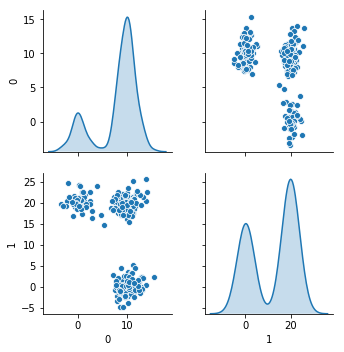

In [33]:
sns.pairplot(df_Heirarchical,diag_kind='kde')

### 11. Find out the linkage matrix

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [35]:

# generate the linkage matrix
df_Heirarchical=pd.DataFrame(df_Heirarchical)
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
model.fit(df_Heirarchical)
Z = linkage(df_Heirarchical, 'ward')

In [36]:
Z

array([[1.25000000e+02, 1.27000000e+02, 4.07784612e-02, 2.00000000e+00],
       [1.81000000e+02, 2.26000000e+02, 5.35470591e-02, 2.00000000e+00],
       [2.50000000e+01, 8.10000000e+01, 6.13588436e-02, 2.00000000e+00],
       [1.59000000e+02, 1.75000000e+02, 7.66367287e-02, 2.00000000e+00],
       [7.40000000e+01, 7.80000000e+01, 7.66683065e-02, 2.00000000e+00],
       [1.40000000e+01, 9.60000000e+01, 9.10635135e-02, 2.00000000e+00],
       [1.68000000e+02, 1.94000000e+02, 1.05423598e-01, 2.00000000e+00],
       [1.56000000e+02, 2.43000000e+02, 1.07756569e-01, 2.00000000e+00],
       [1.01000000e+02, 1.33000000e+02, 1.10559229e-01, 2.00000000e+00],
       [1.50000000e+02, 1.99000000e+02, 1.10681468e-01, 2.00000000e+00],
       [1.92000000e+02, 1.96000000e+02, 1.20372130e-01, 2.00000000e+00],
       [1.53000000e+02, 2.39000000e+02, 1.21225983e-01, 2.00000000e+00],
       [1.90000000e+01, 5.60000000e+01, 1.30363537e-01, 2.00000000e+00],
       [1.73000000e+02, 1.78000000e+02, 1.32922745e

Use ward as linkage metric and distance as Eucledian

In [37]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(df_Heirarchical))
c


0.9558071483747254

### 12. Plot the dendrogram for the consolidated dataframe

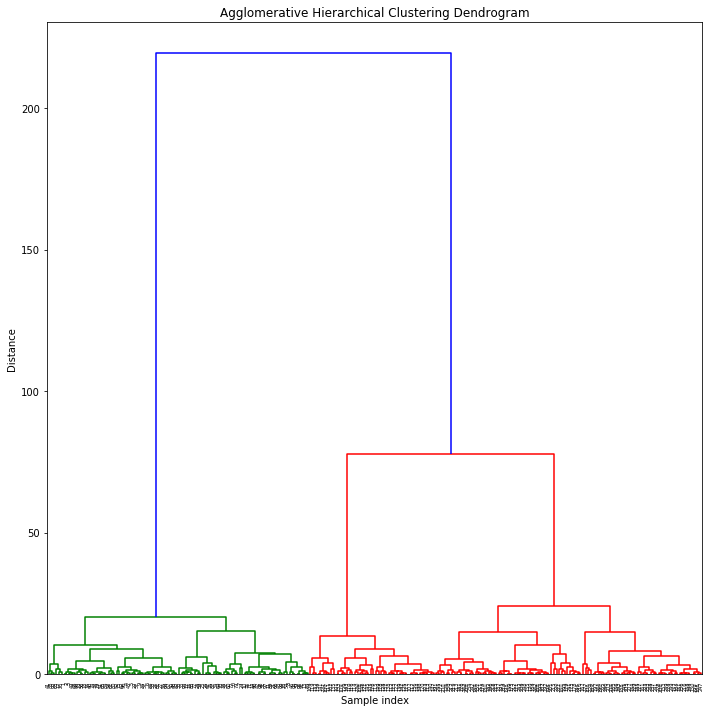

In [38]:

#print(c)
plt.figure(figsize=(10,10))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

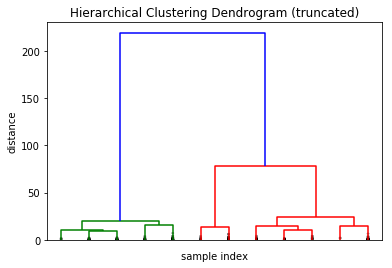

In [39]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [40]:
from scipy.cluster.hierarchy import ward, fcluster


In [41]:
cluster_groups=fcluster(Z, 50, criterion='distance', depth=3 )

df_Heirarchical['Cluster_group']=cluster_groups
cluster_groups


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [42]:
pd.value_counts(df_Heirarchical['Cluster_group'])

3    102
1    100
2     48
Name: Cluster_group, dtype: int64

### Use matplotlib to visually observe the clusters in 2D space 

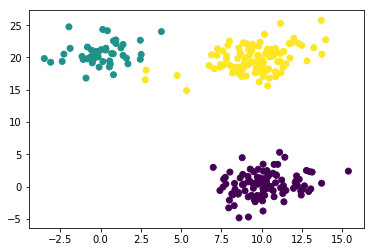

In [43]:
plt.scatter(df_Heirarchical.iloc[:,0],df_Heirarchical.iloc[:,1],c=cluster_groups)